In [109]:
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
#Suppose a company has a revenue of $170 mil; standard deviation for that number is 20
rev_m = 170
rev_stddev = 20
iterations = 1000

In [111]:
#Numpy random normal distribution function
rev = np.random.normal(rev_m, rev_stddev, iterations)
rev

array([175.23321977, 144.11879539, 168.60971681, 202.63032482,
       182.63487031, 158.48416394, 159.8063515 , 181.56468783,
       173.31310022, 168.48407825, 143.17444879, 184.61485856,
       150.4111015 , 176.57510719, 150.7488207 , 180.27489766,
       180.3860059 , 164.78357029, 171.70730417, 196.33408385,
       193.18154295, 190.25624347, 177.02826739, 165.56568278,
       197.11909296, 167.83031851, 180.93349792, 142.24938684,
       160.39100334, 165.71343304, 170.15846607, 182.00801022,
       189.62398522, 179.24313137, 153.51496525, 164.67650141,
       172.34877187, 154.58637165, 197.79207815, 183.10961965,
       193.67380845, 177.28028835, 164.20738201, 157.88999943,
       154.54725752, 148.7893307 , 152.98698865, 177.53192282,
       173.61405933, 169.77803298, 214.30757763, 212.98032246,
       177.45381707, 159.93181767, 147.73917437, 168.12567802,
       180.66686553, 164.10797422, 165.92101584, 181.26514843,
       172.58498829, 178.48601581, 176.78923907, 214.87

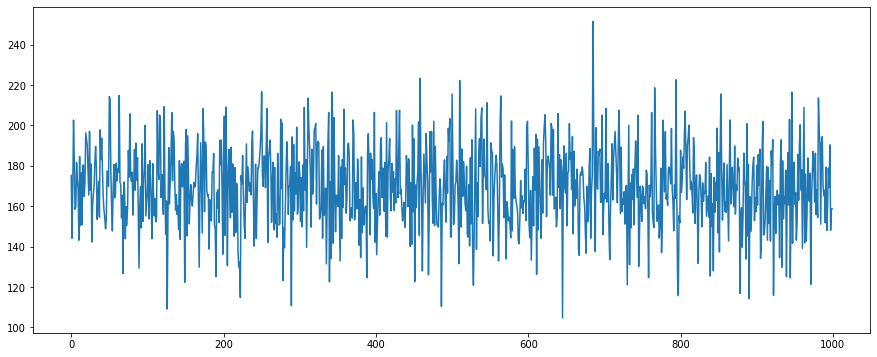

In [112]:
plt.figure(figsize=(15,6))
plt.plot(rev)
plt.show()

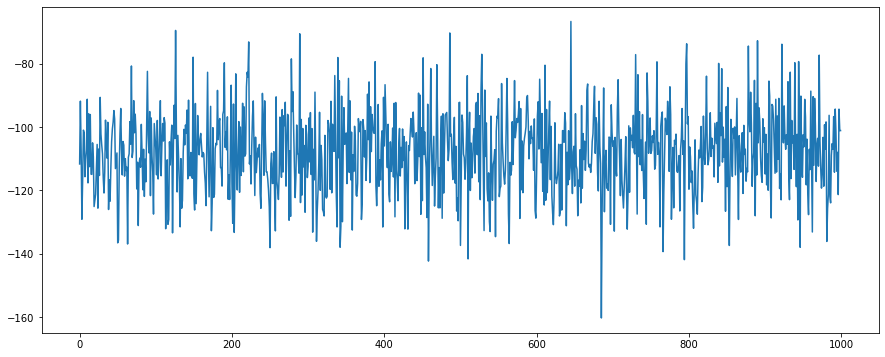

In [113]:
#Cost of goods is expenditure of revenue times normal distribution. We assume that COGS 
#are 60% of company's revenue
COGS = - (rev * np.random.normal(0.6, 0.1))

plt.figure(figsize=(15,6))
plt.plot(COGS)
plt.show()

In [114]:
COGS.mean()

-107.89805005657348

In [115]:
#Deviation of COGS is 10% of it's mean
COGS.std()

12.835678423524184

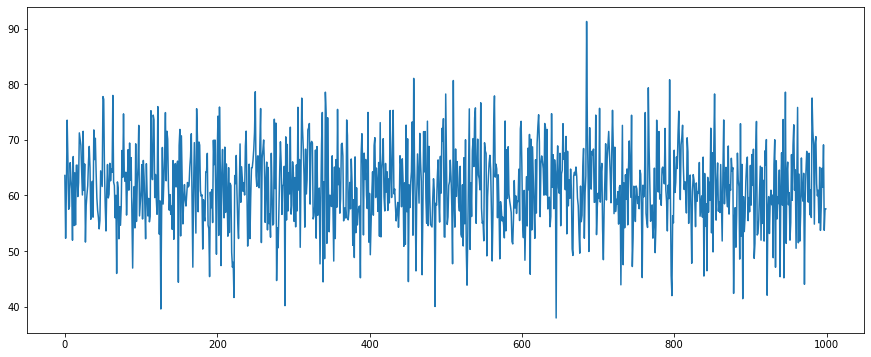

In [116]:
Gross_profit = rev + COGS
Gross_profit

plt.figure(figsize=(15,6))
plt.plot(Gross_profit)
plt.show()

In [117]:
max(Gross_profit)

91.27371554928061

In [118]:
min(Gross_profit)

37.97732499130804

In [119]:
Gross_profit.mean()

61.45823018206186

In [120]:
Gross_profit.std()

7.31114305293059

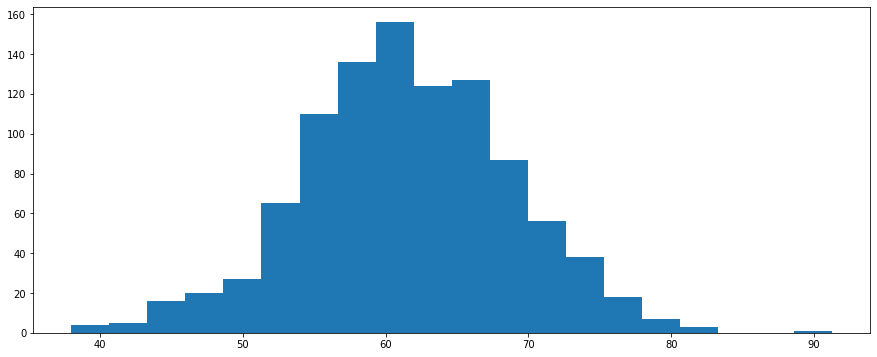

In [121]:
plt.figure(figsize=(15,6))
plt.hist(Gross_profit, bins=20)
plt.show()

## Predicting price with monte carlo

In [122]:
ticker = 'AAPL'
df = pd.DataFrame()
df[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [123]:
log_returns = np.log(1 + df.pct_change())
log_returns

,AAPL
Date,
2007-01-03,NaN
2007-01-04,0.021953
2007-01-05,-0.007147
2007-01-08,0.004926
2007-01-09,0.079800
...,...
2020-03-09,-0.082395
2020-03-10,0.069546
2020-03-11,-0.035348


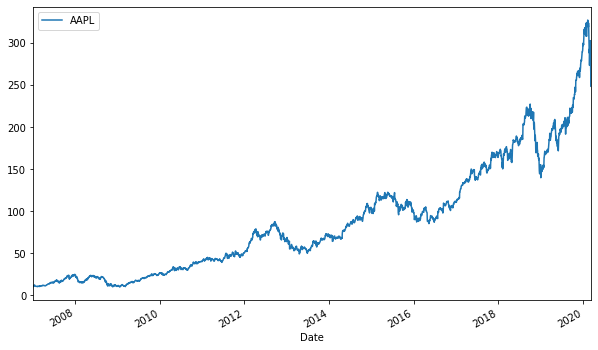

In [124]:
df.plot(figsize=(10, 6));

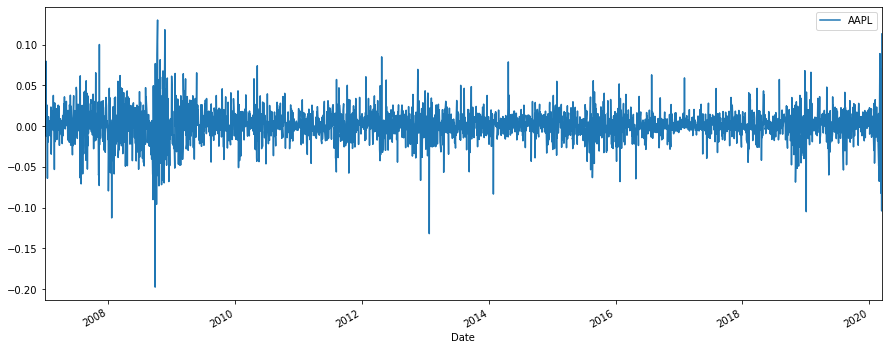

In [125]:
log_returns.plot(figsize=(15, 6));

In [126]:
u = log_returns.mean()
variance = log_returns.var()

In [127]:
drift = u - (0.5 * variance)
drift

AAPL    0.000788
dtype: float64

In [128]:
std_dev = log_returns.std()
std_dev

AAPL    0.020064
dtype: float64

In [129]:
#.array & .values are essentially the same
np.array(drift)
drift.values
std_dev.values

array([0.0200638])

In [130]:
x = np.random.rand(10, 2)
x

array([[0.57221161, 0.61304549],
       [0.19539724, 0.19720792],
       [0.654075  , 0.96209195],
       [0.77665439, 0.58312823],
       [0.11629167, 0.39809919],
       [0.37575061, 0.14784935],
       [0.68407818, 0.52906963],
       [0.74252548, 0.22015465],
       [0.36079097, 0.96169176],
       [0.15301652, 0.89626256]])

In [131]:
#Calculate the distance between the mean and the events
norm.ppf(x)

array([[ 0.18200758,  0.28726553],
       [-0.85817746, -0.85163655],
       [ 0.39634571,  1.7754955 ],
       [ 0.76094282,  0.20990279],
       [-1.19373069, -0.25827022],
       [-0.3166605 , -1.04570185],
       [ 0.47913354,  0.07293135],
       [ 0.65115096, -0.77167101],
       [-0.35634536,  1.77066467],
       [-1.02358137,  1.26053929]])

In [132]:
Z = norm.ppf(np.random.rand(10, 2))
Z

array([[-1.49357368,  0.55825127],
       [-2.26631591, -0.71256379],
       [ 1.05204852, -1.8898157 ],
       [ 0.73898216, -0.06886757],
       [-0.77333579, -0.67659099],
       [-0.95733904, -0.8207353 ],
       [-0.81965236,  1.5512568 ],
       [-1.08010224,  1.02355057],
       [-1.01963761,  1.04694112],
       [-1.21968881,  1.35367163]])

In [149]:
t_intervals = 10
iterations = 25

daily return = e^ln(x)
r = drift + std * Z

In [150]:
daily_returns = np.exp(drift.values + std_dev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [151]:
daily_returns

array([[0.99475581, 0.99253565, 1.01760136, 1.03387412, 1.03675292,
        0.99079384, 1.02002796, 1.00988004, 1.03090982, 1.00349289,
        1.01850364, 0.98512349, 0.96610316, 0.97102805, 0.97719535,
        1.00333622, 1.00132005, 0.98589486, 1.00989216, 1.02064651,
        0.99584588, 1.00542372, 1.03042041, 1.00727741, 1.03516224],
       [0.98259644, 1.02257101, 1.01628299, 0.95515387, 1.01406116,
        1.00004047, 1.00941927, 0.99519332, 1.02995037, 1.00539646,
        0.96903222, 1.02921706, 0.99486721, 1.01212635, 1.01856065,
        0.96485355, 0.98297746, 0.99984506, 0.99487027, 0.95825714,
        1.03017144, 0.97936268, 1.00670896, 0.99715749, 1.01928759],
       [1.03028135, 1.00949422, 0.97133829, 0.98571591, 0.97318069,
        1.01023504, 1.03019622, 0.99725848, 1.03902891, 0.99416746,
        0.98875415, 0.996455  , 0.97971864, 1.00307743, 1.03446091,
        1.00980663, 1.02715328, 1.02539855, 0.99183319, 1.02906827,
        1.01108809, 1.00206473, 0.97934037, 0.

In [152]:
stock_price_0 = df.iloc[-1]
stock_price_0

AAPL    277.970001
Name: 2020-03-13 00:00:00, dtype: float64

In [153]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [154]:
price_list[0] = stock_price_0
price_list

array([[277.97000122, 277.97000122, 277.97000122, 277.97000122,
        277.97000122, 277.97000122, 277.97000122, 277.97000122,
        277.97000122, 277.97000122, 277.97000122, 277.97000122,
        277.97000122, 277.97000122, 277.97000122, 277.97000122,
        277.97000122, 277.97000122, 277.97000122, 277.97000122,
        277.97000122, 277.97000122, 277.97000122, 277.97000122,
        277.97000122],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.    

In [155]:
for t in range(1, 10):
    price_list[t] = price_list[t-1] * daily_returns[t]

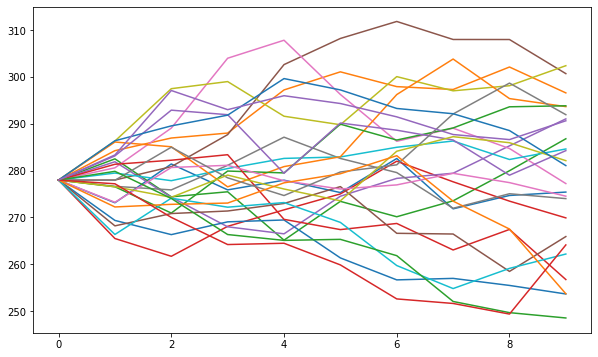

In [156]:
plt.figure(figsize=(10, 6))
plt.plot(price_list);